# BUILDING MODELS

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from collections import defaultdict

import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download("stopwords")
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk import pos_tag


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn import metrics


from wordcloud import WordCloud,STOPWORDS


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

#import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nagraj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nagraj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nagraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df=pd.read_csv('fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

# STRING CONVERTING INTO NUMERICAL 

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['title'] = le.fit_transform(df['title'])
df['location'] = le.fit_transform(df['location'])
df['department'] = le.fit_transform(df['department'])
df['description'] = le.fit_transform(df['description'])
df['company_profile'] = le.fit_transform(df['company_profile'])
df['requirements'] = le.fit_transform(df['requirements'])
df['benefits'] = le.fit_transform(df['benefits'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['required_experience'] = le.fit_transform(df['required_experience'])
df['required_education'] = le.fit_transform(df['required_education'])
df['industry'] = le.fit_transform(df['industry'])
df['function'] = le.fit_transform(df['function'])
df['salary_range'] = le.fit_transform(df['salary_range'])
df = df.reset_index()
df.head()

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,1,6043,2535,758,874,1526,4506,3829,6205,0,1,0,2,4,13,131,22,0
1,1,2,2183,1073,1161,874,50,7255,10526,5570,0,1,0,1,6,13,75,7,0
2,2,3,1763,1867,1337,874,1389,7470,4560,6205,0,1,0,5,7,13,131,37,0
3,3,4,299,1703,1054,874,975,9590,3166,3334,0,1,0,1,5,1,22,31,0
4,4,5,975,1741,1337,874,1210,5724,6495,2254,0,1,1,1,5,1,51,16,0


In [6]:
del df['index']

In [7]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   job_id               17880 non-null  int64
 1   title                17880 non-null  int32
 2   location             17880 non-null  int32
 3   department           17880 non-null  int32
 4   salary_range         17880 non-null  int32
 5   company_profile      17880 non-null  int32
 6   description          17880 non-null  int32
 7   requirements         17880 non-null  int32
 8   benefits             17880 non-null  int32
 9   telecommuting        17880 non-null  int64
 10  has_company_logo     17880 non-null  int64
 11  has_questions        17880 non-null  int64
 12  employment_type      17880 non-null  int32
 13  required_experience  17880 non-null  int32
 14  required_education   17880 non-null  int32
 15  industry             17880 non-null  int32
 16  function             1

In [9]:
df.describe()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,5408.917897,1582.547036,1105.928020,807.808166,1070.055928,7384.891219,6917.349217,4348.463479,0.042897,0.795302,0.491723,1.833557,4.632047,7.602852,74.503412,23.807103,0.048434
std,5161.655742,3241.045496,907.896767,372.464176,181.131226,539.431219,4223.920588,3833.303495,2027.667274,0.202631,0.403492,0.499945,1.675983,2.544555,5.369239,43.161827,12.427513,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,2550.750000,813.000000,932.000000,874.000000,599.000000,3765.750000,3564.750000,2651.750000,0.000000,1.000000,0.000000,1.000000,2.000000,1.000000,35.000000,12.000000,0.000000
50%,8940.500000,5226.500000,1564.000000,1337.000000,874.000000,1176.000000,7723.500000,7167.500000,5048.500000,0.000000,1.000000,0.000000,1.000000,5.000000,9.000000,61.000000,23.000000,0.000000
75%,13410.250000,8273.000000,2475.000000,1337.000000,874.000000,1535.250000,10925.250000,10338.250000,6205.000000,0.000000,1.000000,1.000000,3.000000,7.000000,13.000000,131.000000,37.000000,0.000000
max,17880.000000,11230.000000,3105.000000,1337.000000,874.000000,1709.000000,14801.000000,11968.000000,6205.000000,1.000000,1.000000,1.000000,5.000000,7.000000,13.000000,131.000000,37.000000,1.000000


In [10]:
df.columns


Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

## CORRELATION MATRIX

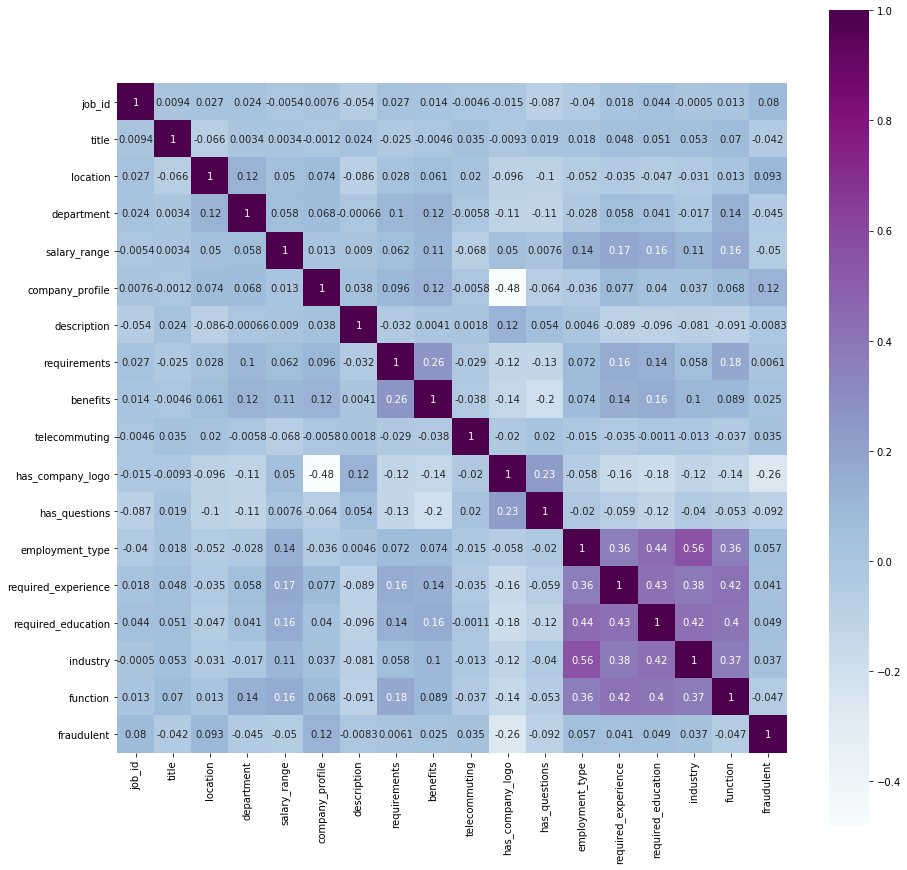

In [11]:
matrix = df.corr() 
plt.figure(figsize=(15,15))
sns.heatmap(matrix, square=True, cmap="BuPu",annot=True)

# SPLITING DATASET (TRAINING AND TESTING DATA)

In [12]:
X = df[['job_id', 'title', 'location', 'department', 'salary_range','industry', 'function']]
Y = df['fraudulent']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state=0,test_size=.30)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((12516, 7), (5364, 7), (12516,), (5364,))

In [13]:
X_train

,job_id,title,location,department,salary_range,industry,function
9770,9771,1620,51,1337,68,39,37
15336,15337,3205,2606,1337,874,31,37
16715,16716,2258,1899,316,563,59,7
6107,6108,6612,795,859,874,22,1
16679,16680,10597,83,651,874,131,37
...,...,...,...,...,...,...,...
9225,9226,9186,1564,932,71,0,33
13123,13124,7717,1579,1337,874,24,12
9845,9846,9058,911,651,874,75,12
10799,10800,2198,1679,1337,874,37,7


In [14]:
X_test

,job_id,title,location,department,salary_range,industry,function
9256,9257,4936,1592,1337,874,29,37
3860,3861,7292,813,626,874,131,37
6190,6191,9911,1652,1337,874,31,11
13658,13659,2815,1560,1337,874,118,13
11231,11232,3936,2899,1337,874,22,37
...,...,...,...,...,...,...,...
3140,3141,4623,296,1337,874,61,37
12815,12816,7631,2875,1337,874,88,12
12791,12792,8369,2259,1054,874,58,31
13335,13336,10762,1526,954,874,61,3


In [15]:
Y_train

9770     0
15336    0
16715    0
6107     0
16679    0
        ..
9225     0
13123    0
9845     1
10799    0
2732     0
Name: fraudulent, Length: 12516, dtype: int64

In [16]:
Y_test

9256     0
3860     0
6190     0
13658    0
11231    0
        ..
3140     0
12815    1
12791    0
13335    0
2687     0
Name: fraudulent, Length: 5364, dtype: int64

# LOGISTIC REGRESSION MODEL

In [17]:
from sklearn.linear_model import LogisticRegression
LgR = LogisticRegression()
LgR.fit(X_train, Y_train)

LogisticRegression()

In [18]:
Y_pred = LgR.predict(X_test)

In [19]:
df_lgr = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_lgr

,Y_test,Y_pred
9256,0,0
3860,0,0
6190,0,0
13658,0,0
11231,0,0
...,...,...
3140,0,0
12815,1,0
12791,0,0
13335,0,0


In [20]:
metrics.accuracy_score(Y_pred, Y_test)

0.9573079791200596

In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5137
           1       0.40      0.02      0.03       227

    accuracy                           0.96      5364
   macro avg       0.68      0.51      0.51      5364
weighted avg       0.93      0.96      0.94      5364



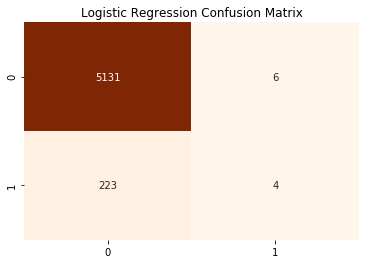

In [22]:
lgr_cm = confusion_matrix(Y_test, Y_pred)

# Calculating the confusion matrices for the Logistic Regression model
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(lgr_cm,cbar=False,annot=True,cmap="Oranges",fmt="d")

# K-NEAREST NEIGHBORS MODEL

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [24]:
Y_pred = knn.predict(X_test)
df_knn = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_knn

,Y_test,Y_pred
9256,0,0
3860,0,0
6190,0,0
13658,0,0
11231,0,0
...,...,...
3140,0,0
12815,1,0
12791,0,0
13335,0,0


In [25]:
metrics.accuracy_score(Y_pred,Y_test)

0.9653243847874721

In [26]:
print(classification_report(Y_test, Y_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5137
           1       0.66      0.37      0.47       227

    accuracy                           0.97      5364
   macro avg       0.82      0.68      0.73      5364
weighted avg       0.96      0.97      0.96      5364



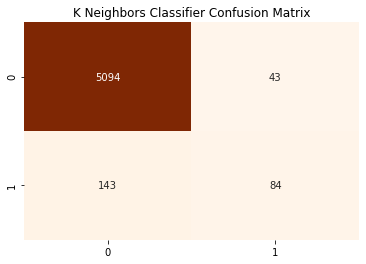

In [27]:
knn_cm = confusion_matrix(Y_test, Y_pred)

# Calculating the confusion matrices for the Logistic Regression model
plt.title("K Neighbors Classifier Confusion Matrix")
sns.heatmap(knn_cm,cbar=False,annot=True,cmap="Oranges",fmt="d")

# RANDOM FOREST MODEL

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(X_train, Y_train)
pickle.dump(rfc, open("fake_job_listing_rf.pkl", "wb")) 

In [29]:
Y_pred = rfc.predict(X_test)
df_rfc = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_rfc

,Y_test,Y_pred
9256,0,0
3860,0,0
6190,0,0
13658,0,0
11231,0,0
...,...,...
3140,0,0
12815,1,1
12791,0,0
13335,0,0


In [30]:
metrics.accuracy_score(Y_pred,Y_test)

0.9819164802386279

In [31]:
print(classification_report(Y_test, Y_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5137
           1       0.93      0.62      0.74       227

    accuracy                           0.98      5364
   macro avg       0.96      0.81      0.87      5364
weighted avg       0.98      0.98      0.98      5364



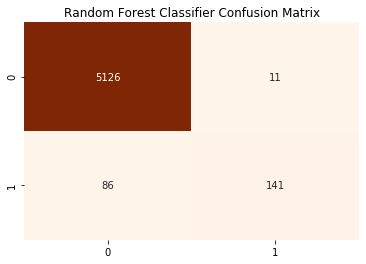

In [32]:
rf_cm = confusion_matrix(Y_test, Y_pred)

# Calculating the confusion matrices for the Logistic Regression model
plt.title("Random Forest Classifier Confusion Matrix")
sns.heatmap(rf_cm,cbar=False,annot=True,cmap="Oranges",fmt="d")

# LINEAR SUPPORT VECTOR CLASSIFIER MODEL

In [33]:
# Create a LinearSVC model
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
# Training
lsvc.fit(X_train, Y_train)

LinearSVC()

In [34]:
Y_pred = lsvc.predict(X_test)

df_lsvc = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_lsvc

,Y_test,Y_pred
9256,0,0
3860,0,0
6190,0,0
13658,0,0
11231,0,0
...,...,...
3140,0,0
12815,1,0
12791,0,0
13335,0,0


In [35]:
lsvc_score = metrics.accuracy_score(Y_test,Y_pred)
print(lsvc_score)

0.9576808351976137


In [36]:
print(classification_report(Y_test, Y_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5137
           1       0.00      0.00      0.00       227

    accuracy                           0.96      5364
   macro avg       0.48      0.50      0.49      5364
weighted avg       0.92      0.96      0.94      5364



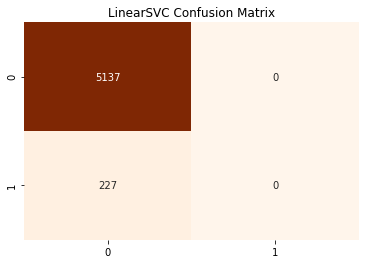

In [37]:
lsvc_cm = confusion_matrix(Y_test, Y_pred)

# Calculating the confusion matrices for the Logistic Regression model
plt.title("LinearSVC Confusion Matrix")
sns.heatmap(lsvc_cm,cbar=False,annot=True,cmap="Oranges",fmt="d")

# NAVIE BAYES MODEL

## 1.MULTINOMIAL NAVIE BAYES

In [38]:
# Creating a MulitnomialNB model
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

MultinomialNB()

In [39]:
Y_pred = mnb.predict(X_test)

df_mnb = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_mnb

,Y_test,Y_pred
9256,0,0
3860,0,0
6190,0,0
13658,0,1
11231,0,1
...,...,...
3140,0,0
12815,1,0
12791,0,0
13335,0,0


In [40]:
metrics.accuracy_score(Y_pred,Y_test)

0.5853840417598807

In [41]:
print(classification_report(Y_test, Y_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.97      0.59      0.73      5137
           1       0.06      0.58      0.11       227

    accuracy                           0.59      5364
   macro avg       0.51      0.58      0.42      5364
weighted avg       0.93      0.59      0.70      5364



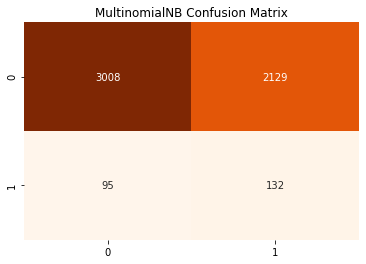

In [42]:
mnb_cm = confusion_matrix(Y_test, Y_pred)

# Calculating the confusion matrices for the Logistic Regression model
plt.title("MultinomialNB Confusion Matrix")
sns.heatmap(mnb_cm,cbar=False,annot=True,cmap="Oranges",fmt="d")

## 2.GAUSSIAN NAVIE BAYES

In [43]:
# Creating a MulitnomialNB model
gnb=GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [44]:
Y_pred = gnb.predict(X_test)

df_gnb = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_gnb

,Y_test,Y_pred
9256,0,0
3860,0,0
6190,0,0
13658,0,0
11231,0,0
...,...,...
3140,0,0
12815,1,0
12791,0,0
13335,0,0


In [45]:
metrics.accuracy_score(Y_pred,Y_test)

0.9472408650260999

In [46]:
print(classification_report(Y_test, Y_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5137
           1       0.16      0.06      0.08       227

    accuracy                           0.95      5364
   macro avg       0.56      0.52      0.53      5364
weighted avg       0.93      0.95      0.94      5364



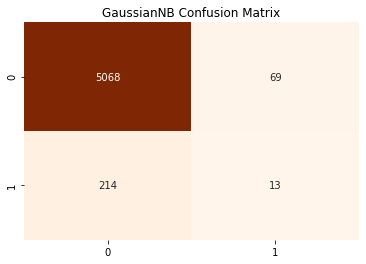

In [47]:
gnb_cm = confusion_matrix(Y_test, Y_pred)

# Calculating the confusion matrices for the Logistic Regression model
plt.title("GaussianNB Confusion Matrix")
sns.heatmap(gnb_cm,cbar=False,annot=True,cmap="Oranges",fmt="d")

## 3.BERNOULLI NAVIE BAYES

In [48]:
bnb=BernoulliNB()
bnb.fit(X_train, Y_train)

BernoulliNB()

In [49]:
Y_pred = bnb.predict(X_test)
df_bnb = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_bnb

,Y_test,Y_pred
9256,0,0
3860,0,0
6190,0,0
13658,0,0
11231,0,0
...,...,...
3140,0,0
12815,1,0
12791,0,0
13335,0,0


In [50]:
metrics.accuracy_score(Y_pred,Y_test)

0.9567486950037286

In [51]:
print(classification_report(Y_test, Y_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5137
           1       0.27      0.01      0.03       227

    accuracy                           0.96      5364
   macro avg       0.62      0.51      0.50      5364
weighted avg       0.93      0.96      0.94      5364



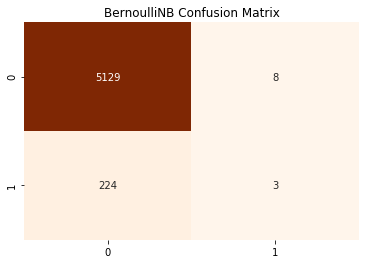

In [52]:
bnb_cm = confusion_matrix(Y_test, Y_pred)

# Calculating the confusion matrices for the Logistic Regression model
plt.title("BernoulliNB Confusion Matrix")
sns.heatmap(bnb_cm,cbar=False,annot=True,cmap="Oranges",fmt="d")

# DECISION TREE MODEL

In [53]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()
# Train Decision Tree Classifer
dtc.fit(X_train,Y_train)
print(type(dtc))
pickle.dump(dtc, open("save.p", "wb")) 

<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [54]:
#Predict the response for test dataset
Y_pred = dtc.predict(X_test)
# Model Accuracy, how often is the classifier correct?
metrics.accuracy_score(Y_test, Y_pred)

0.9675615212527964

In [55]:
print(classification_report(Y_test, Y_pred, target_names = ['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5137
           1       0.59      0.73      0.66       227

    accuracy                           0.97      5364
   macro avg       0.79      0.85      0.82      5364
weighted avg       0.97      0.97      0.97      5364



In [56]:
feature_col=df.columns
feature_col

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

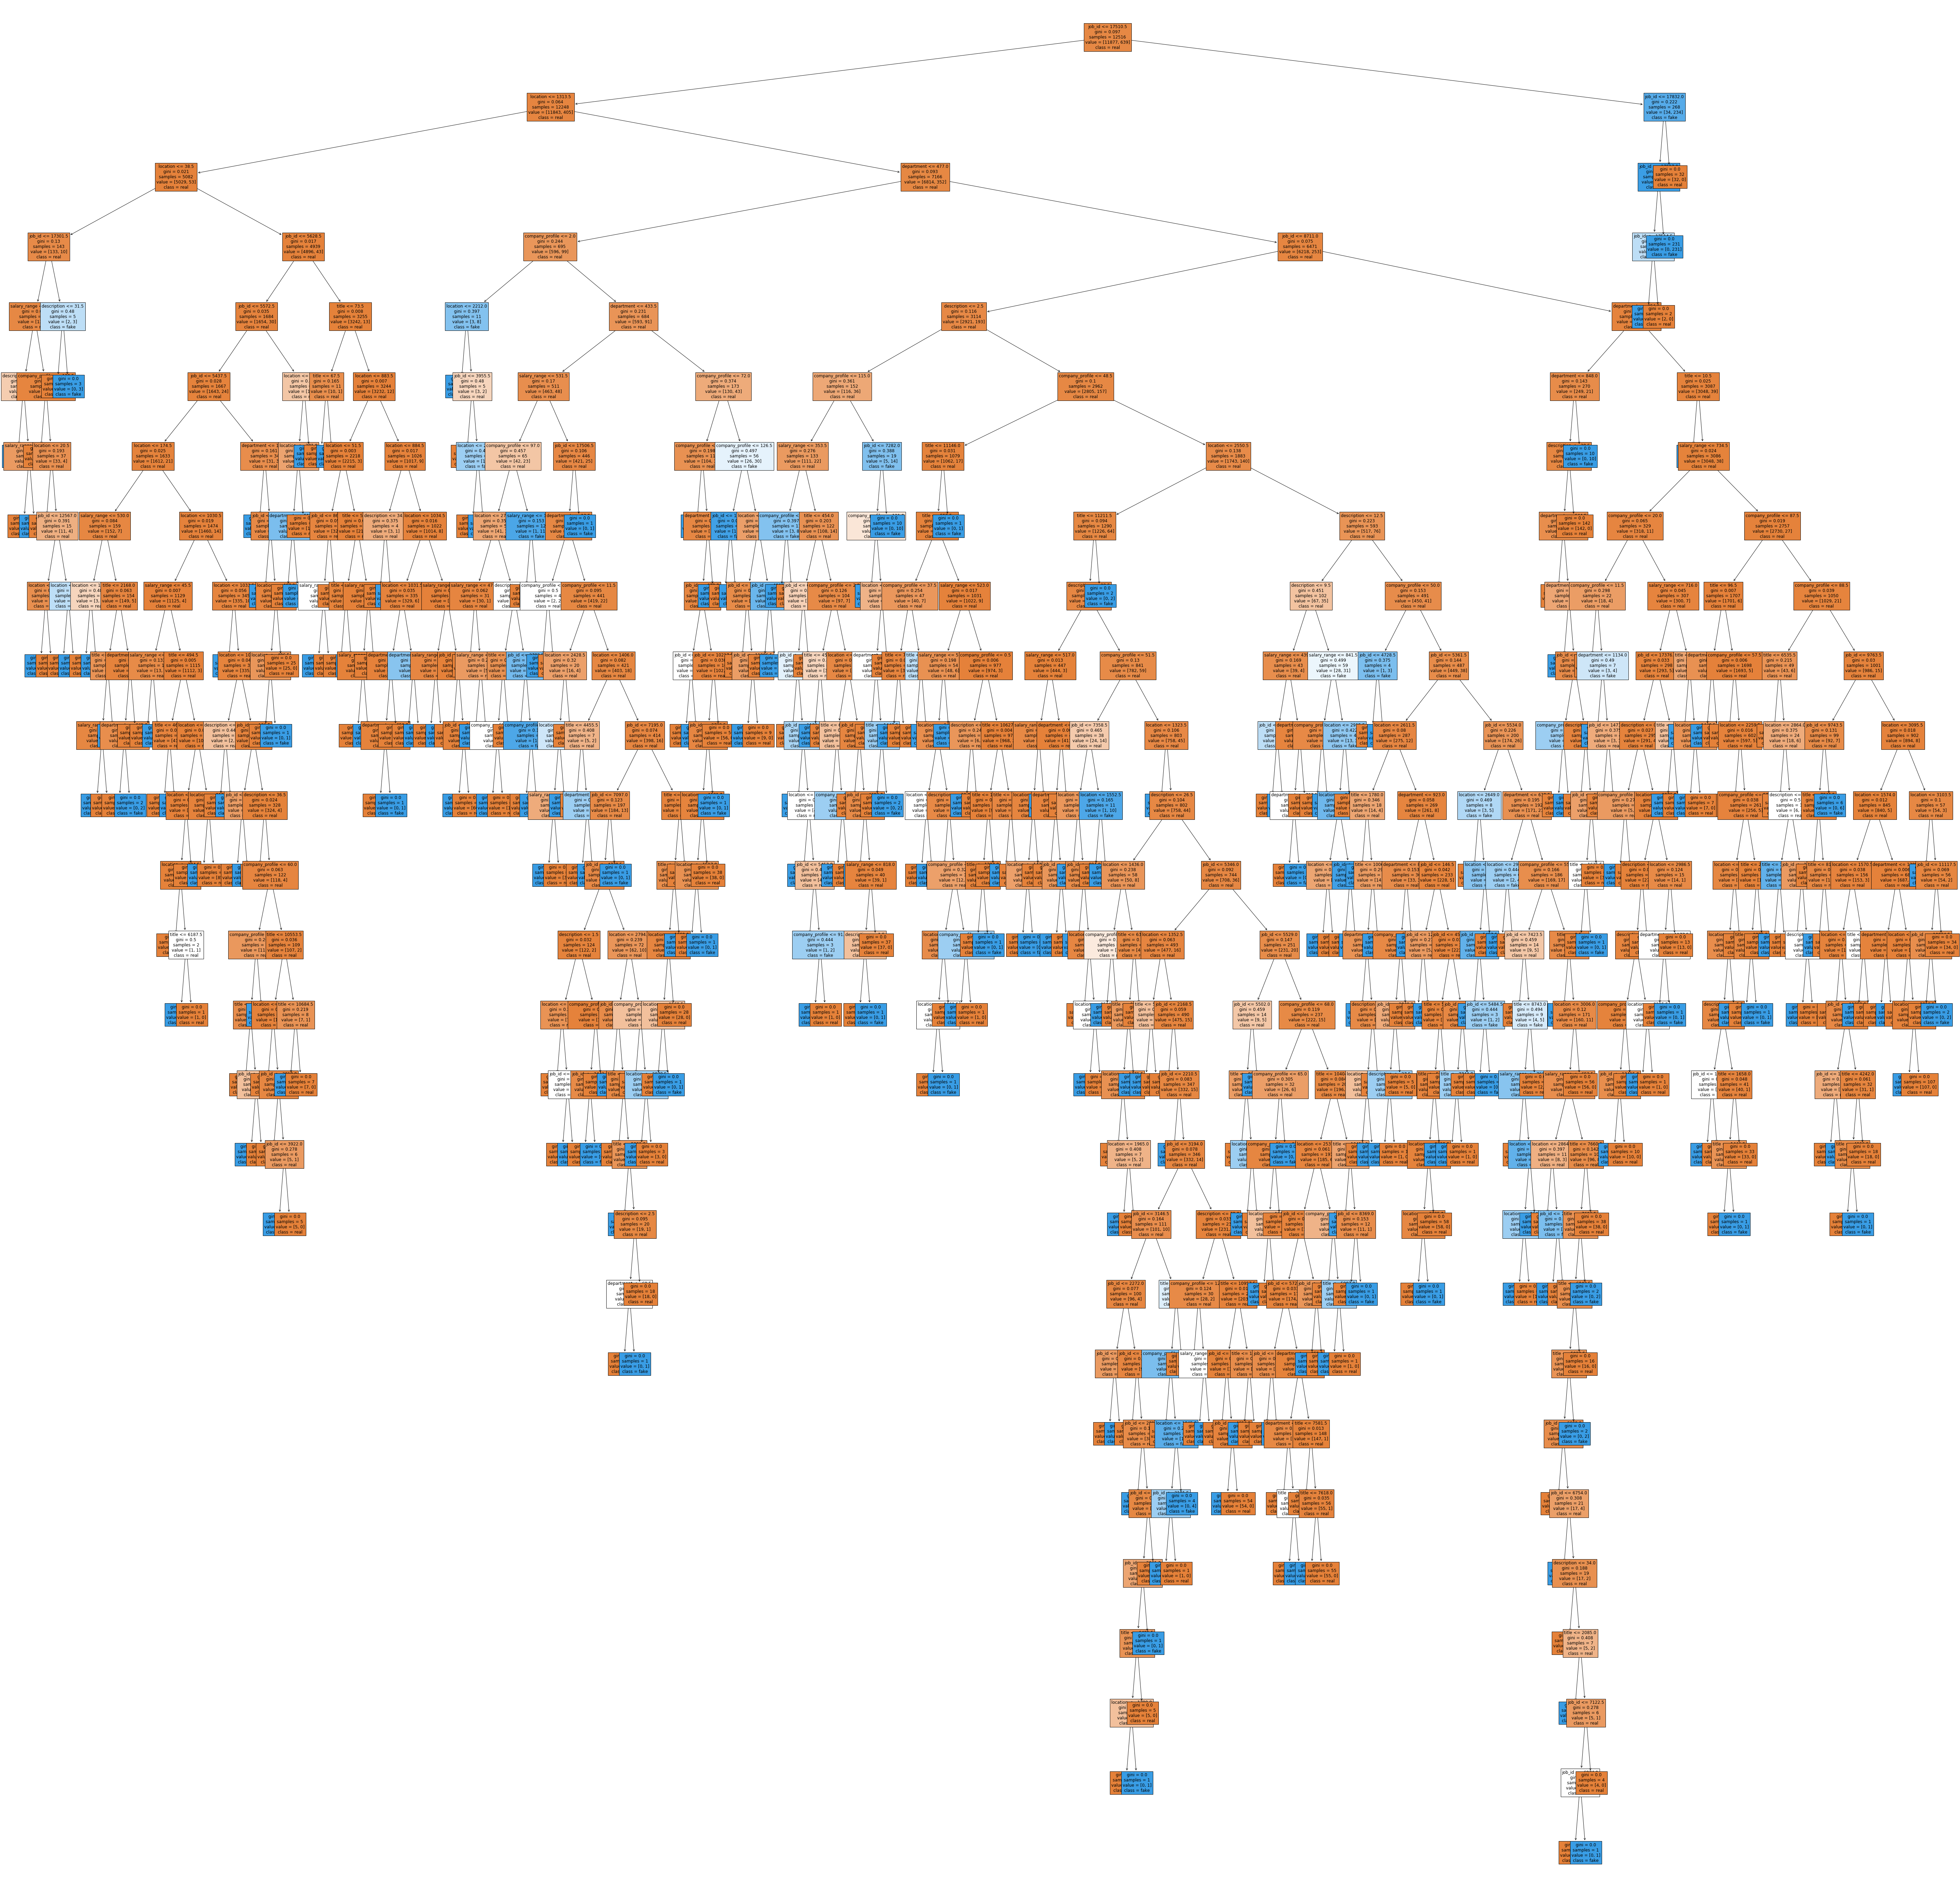

In [57]:
#! pip install tree --user
from sklearn import tree
import matplotlib.pyplot as plt
#from sklearn import plot_tree
plt.figure(figsize=(100,100))
_=tree.plot_tree(dtc,
          filled=True,
          fontsize=12,
          feature_names=feature_col,
          class_names={1:'fake',0:'real'})